<a href="https://colab.research.google.com/github/geomyll33/Beautez/blob/master/EYATH_Multiple_TIme_series_Forecasting_DeepAR_GluonTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade mxnet==1.6.0
!pip install gluonts

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import numpy as np

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [ ]:
df=pd.read_csv("/content/TANKS.csv",parse_dates=['timestamp'],index_col='timestamp')
df

,indication,tank
timestamp,,
2020-12-22 06:21:00,1.97,KAL
2020-12-22 06:41:00,4.68,LYK
2020-12-22 06:46:00,7.14,KAFK
2020-12-22 06:46:00,7.79,TOYMP
2020-12-22 06:52:00,2.43,NEAP
...,...,...
2021-01-28 11:11:00,4.60,LYK
2021-01-28 11:26:00,4.53,GYMN
2021-01-28 12:46:00,4.79,GYMN


# Resample_
Η συνάρτηση resample () δημιούργησε τις σειρές ανα 15 λεπτά τοποθετώντας τις τιμές NaN στις νέες τιμές.
Η συνάρτηση mean() ή πολυονυμικη interpolate ()  παρεμβάλλει τις τιμές που λείπουν

In [ ]:
df=pd.pivot_table(df,values='indication',index=['timestamp'],columns=['tank'])

df.fillna(method='ffill',inplace=True)
df.resample('15min').mean().fillna(method='ffill', inplace=True)
df.fillna(0,inplace=True)
df

In [ ]:
a_series = (df != 0).any(axis=1)
print(a_series)
df1 = df.loc[a_series]
df1

timestamp
2020-12-22 06:21:00    True
2020-12-22 06:41:00    True
2020-12-22 06:46:00    True
2020-12-22 06:52:00    True
2020-12-22 06:57:00    True
                       ... 
2021-01-28 11:11:00    True
2021-01-28 11:26:00    True
2021-01-28 12:46:00    True
2021-01-28 12:55:00    True
2021-01-28 13:59:00    True
Length: 10597, dtype: bool


tank,40ekl,AGPAVL,ANAL,EPT,GYMN,KAFK,KAL,KOINPYL,LYK,NEAP,OYTS,POSTA,SYK,TOYMP
timestamp,,,,,,,,,,,,,,
2020-12-22 06:21:00,0.00,0.00,0.00,0.00,0.00,0.00,1.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-12-22 06:41:00,0.00,0.00,0.00,0.00,0.00,0.00,1.97,0.00,4.68,0.00,0.00,0.00,0.00,0.00
2020-12-22 06:46:00,0.00,0.00,0.00,0.00,0.00,7.14,1.97,0.00,4.68,0.00,0.00,0.00,0.00,7.79
2020-12-22 06:52:00,0.00,0.00,0.00,0.00,0.00,7.14,1.97,0.00,4.68,2.43,0.00,0.00,0.00,7.79
2020-12-22 06:57:00,0.00,0.00,0.00,0.00,0.00,7.14,1.97,0.00,4.68,2.43,0.00,0.00,2.43,7.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-28 11:11:00,2.47,4.31,4.59,6.77,4.52,6.13,2.34,2.62,4.60,2.86,3.92,4.86,2.80,4.67
2021-01-28 11:26:00,2.47,4.31,4.59,6.77,4.53,6.13,2.34,2.62,4.60,2.86,3.92,4.86,2.80,4.67
2021-01-28 12:46:00,2.47,4.31,4.59,6.77,4.79,6.13,2.34,2.62,4.60,2.86,3.92,4.86,2.80,4.67


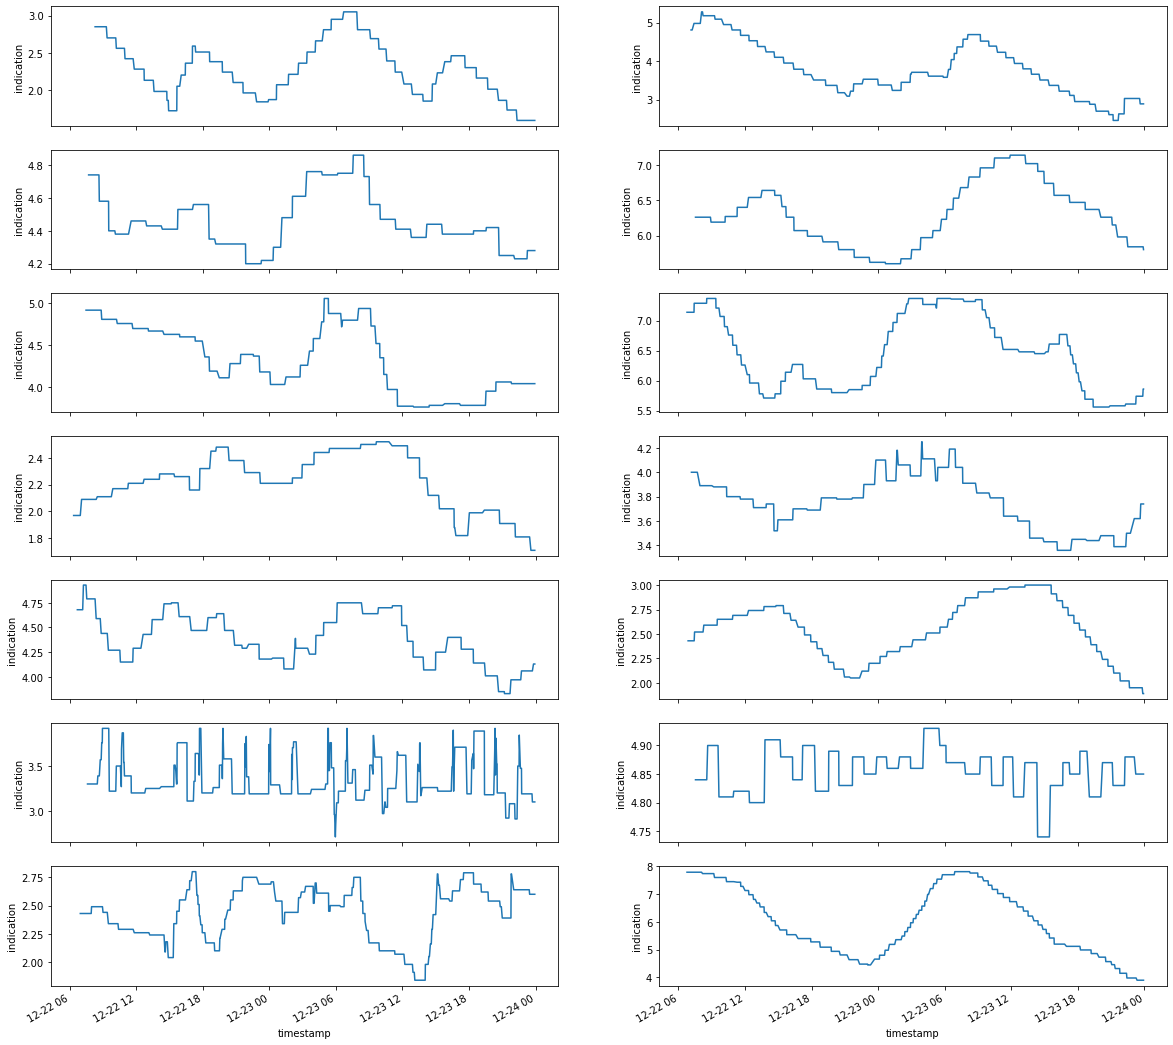

In [ ]:
fig,axs=plt.subplots(7,2,figsize=(20,20),sharex=True)
axx=axs.ravel()
for i in range(0,14):
  df[df1.columns[i]].loc['2020-12-22':'2020-12-23'].plot(ax=axx[i])
  axx[i].set_xlabel('timestamp')
  axx[i].set_ylabel('indication')
  axx[i].grid(which='minor',axis='x')

# prepare data

In [ ]:
df_input=df1.reset_index(drop=True).T.reset_index()#raws to columns


In [ ]:
df_input

,tank,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,10557,10558,10559,10560,10561,10562,10563,10564,10565,10566,10567,10568,10569,10570,10571,10572,10573,10574,10575,10576,10577,10578,10579,10580,10581,10582,10583,10584,10585,10586,10587,10588,10589,10590,10591,10592,10593,10594,10595,10596
0,40ekl,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.70,2.70,...,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47
1,AGPAVL,0.00,0.00,0.00,0.00,0.00,0.00,4.81,4.81,4.81,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,5.28,5.28,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.09,5.09,5.09,...,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31
2,ANAL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,...,4.34,4.50,4.50,4.50,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59
3,EPT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.19,6.19,6.19,6.19,6.19,6.19,6.19,6.19,...,6.08,6.08,6.08,6.08,6.08,6.22,6.22,6.22,6.22,6.22,6.22,6.22,6.34,6.34,6.34,6.34,6.52,6.52,6.52,6.52,6.66,6.66,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77
4,GYMN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.81,4.81,4.81,4.81,4.81,4.81,4.81,4.81,4.81,...,3.93,3.93,3.93,3.93,3.93,3.93,4.07,4.27,4.27,4.46,4.46,4.46,4.46,4.46,4.65,4.65,4.65,4.65,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.87,4.87,4.87,4.65,4.65,4.54,4.54,4.52,4.52,4.52,4.53,4.79,4.65,4.55
5,KAFK,0.00,0.00,7.14,7.14,7.14,7.14,7.14,7.14,7.14,7.14,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.21,...,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13
6,KAL,1.97,1.97,1.97,1.97,1.97,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,...,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34
7,KOINPYL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.88,3.88,3.88,3.88,3.88,...,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62
8,LYK,0.00,4.68,4.68,4.68,4.68,4.68,4.68,4.68,4.93,4.93,4.93,4.93,4.93,4.79,4.79,4.79,4.79,4.79,4.79,4.79,4.79,4.79,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.44,4.44,4.44,4.44,4.44,4.44,4.44,4.44,4.44,4.44,...,4.83,4.83,4.93,4.93,4.93,4.93,4.93,4.93,4.86,4.86,4.86,4.67,4.67,4.67,4.56,4.56,4.56,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.61,4.61,4.61,4.61,4.61,4.61,4.79,4.79,4.68,4.68,4.72,4.60,4.60,4

In [ ]:
ts_code=df_input['tank'].astype('category').cat.codes.values#tranform index to categorical labels

In [ ]:
ts_code

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int8)

In [ ]:
df_input

,tank,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,10557,10558,10559,10560,10561,10562,10563,10564,10565,10566,10567,10568,10569,10570,10571,10572,10573,10574,10575,10576,10577,10578,10579,10580,10581,10582,10583,10584,10585,10586,10587,10588,10589,10590,10591,10592,10593,10594,10595,10596
0,40ekl,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.70,2.70,...,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47
1,AGPAVL,0.00,0.00,0.00,0.00,0.00,0.00,4.81,4.81,4.81,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,4.98,5.28,5.28,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.18,5.09,5.09,5.09,...,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31,4.31
2,ANAL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,...,4.34,4.50,4.50,4.50,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.59
3,EPT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.19,6.19,6.19,6.19,6.19,6.19,6.19,6.19,...,6.08,6.08,6.08,6.08,6.08,6.22,6.22,6.22,6.22,6.22,6.22,6.22,6.34,6.34,6.34,6.34,6.52,6.52,6.52,6.52,6.66,6.66,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77,6.77
4,GYMN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.92,4.81,4.81,4.81,4.81,4.81,4.81,4.81,4.81,4.81,...,3.93,3.93,3.93,3.93,3.93,3.93,4.07,4.27,4.27,4.46,4.46,4.46,4.46,4.46,4.65,4.65,4.65,4.65,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.74,4.87,4.87,4.87,4.65,4.65,4.54,4.54,4.52,4.52,4.52,4.53,4.79,4.65,4.55
5,KAFK,0.00,0.00,7.14,7.14,7.14,7.14,7.14,7.14,7.14,7.14,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.29,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.37,7.21,...,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13,6.13
6,KAL,1.97,1.97,1.97,1.97,1.97,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,...,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34,2.34
7,KOINPYL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.88,3.88,3.88,3.88,3.88,...,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62,2.62
8,LYK,0.00,4.68,4.68,4.68,4.68,4.68,4.68,4.68,4.93,4.93,4.93,4.93,4.93,4.79,4.79,4.79,4.79,4.79,4.79,4.79,4.79,4.79,4.59,4.59,4.59,4.59,4.59,4.59,4.59,4.44,4.44,4.44,4.44,4.44,4.44,4.44,4.44,4.44,4.44,...,4.83,4.83,4.93,4.93,4.93,4.93,4.93,4.93,4.86,4.86,4.86,4.67,4.67,4.67,4.56,4.56,4.56,4.39,4.39,4.39,4.39,4.39,4.39,4.39,4.61,4.61,4.61,4.61,4.61,4.61,4.79,4.79,4.68,4.68,4.72,4.60,4.60,4

# prepare train and test data

In [ ]:
df_train=df_input.iloc[:,1:2500].values#shape is 14X3584 do not shuffle!!
df_test=df_input.iloc[:,2500:].values

In [ ]:
df_train.shape

(14, 2499)

In [ ]:
df_test.shape

(14, 8098)

In [ ]:
freq='15min'
start_train=pd.Timestamp('2020-12-12', freq=freq)
start_test=pd.Timestamp('2021-01-25',freq=freq)
prediction_length=288 #15minutesX4(hour)X24(day)X3=3day prediction

In [ ]:
estimator=DeepAREstimator(freq=freq,
                          context_length=288,
                          prediction_length=prediction_length,
                          use_feat_static_cat=True,cardinality=[1],
                          num_layers=4,
                          num_cells=64,
                          cell_type='lstm',
                          trainer=Trainer(epochs=1))

In [ ]:
df_train[0:12]

array([[0.  , 0.  , 0.  , ..., 2.45, 2.45, 2.57],
       [0.  , 0.  , 0.  , ..., 3.7 , 3.7 , 3.7 ],
       [0.  , 0.  , 0.  , ..., 4.5 , 4.5 , 4.5 ],
       ...,
       [0.  , 0.  , 0.  , ..., 2.06, 2.06, 2.06],
       [0.  , 0.  , 0.  , ..., 2.91, 3.39, 3.39],
       [0.  , 0.  , 0.  , ..., 4.87, 4.87, 4.87]])

In [ ]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

train_ds=ListDataset([
     {
        FieldName.TARGET:target,
        FieldName.START:start_train,
        FieldName.FEAT_STATIC_CAT:fsc               
                      }
                      for (target,fsc)in zip(df_train[0:12],
                                             ts_code[0:12].reshape(-1,1))
                      ],freq=freq)                 

test_ds=ListDataset([
                     {
                       FieldName.TARGET:target,
                       FieldName.START:start_test,
                       FieldName.FEAT_STATIC_CAT:fsc
                      }
                      for (target,fsc)in zip(df_test[0:12],
                                             ts_code[0:12].reshape(-1,1))
                      ],freq=freq)
                     

In [ ]:
next(iter(train_ds))

{'feat_static_cat': array([0], dtype=int32),
 'source': SourceContext(source='list_data', row=0),
 'start': Timestamp('2020-12-12 00:00:00', freq='15T'),
 'target': array([0.  , 0.  , 0.  , ..., 2.45, 2.45, 2.57], dtype=float32)}

In [ ]:
predictor=estimator.train(training_data=train_ds)

  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [02:38<00:00,  3.17s/it, epoch=1/1, avg_epoch_loss=0.605]


In [ ]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [ ]:
forecast_it,ts_it=make_evaluation_predictions(
    dataset=test_ds,
    predictor=predictor,
    num_samples=12,
)

In [ ]:
from tqdm.autonotebook import tqdm

print('Obtaining time series conditionong values...')
tss=list(tqdm(ts_it,total=len(df_test)))
print('Obtaining time series predictions...')
forecasts=list(tqdm(forecast_it,total=len(df_test)))

Obtaining time series conditionong values...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  """Entry point for launching an IPython kernel.



Obtaining time series predictions...


In [ ]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length=prediction_length
    prediction_intervals=(80.0,95.0)
    legend=["observations","median prediction"]+[f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig,ax=plt.subplots(1,1,figsize=(10,7))
    ts_entry[-plot_length:].plot(ax=ax)
    forecast_entry.plot(prediction_intervals=prediction_intervals,color='g')
    plt.grid(which="both")
    plt.legend(legend,loc="upper left")
    plt.show()

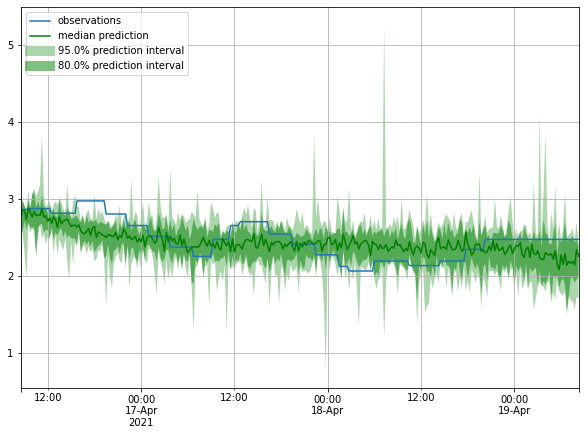

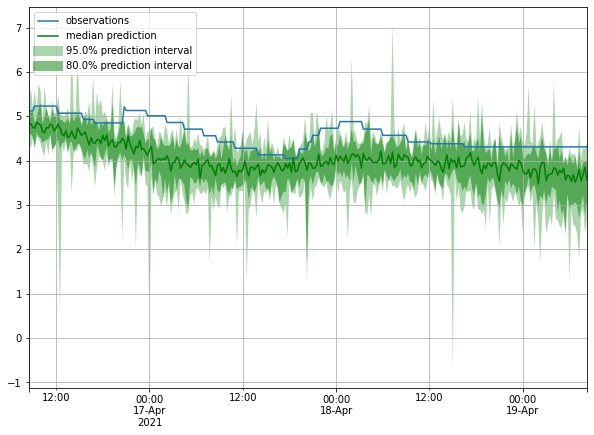

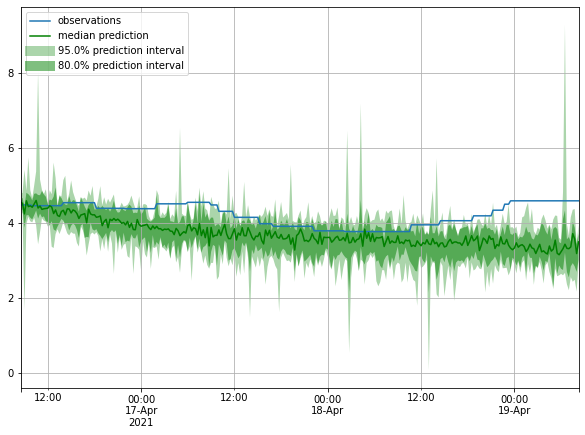

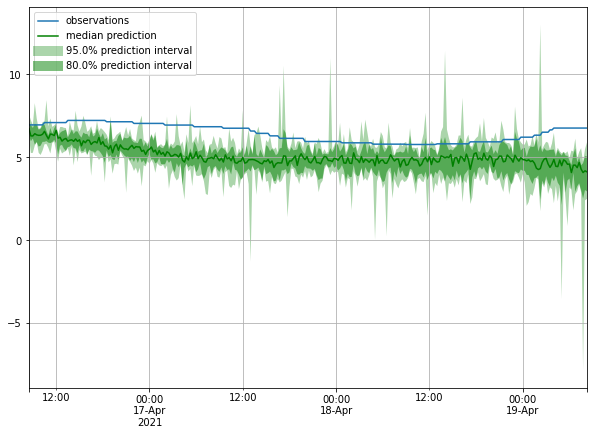

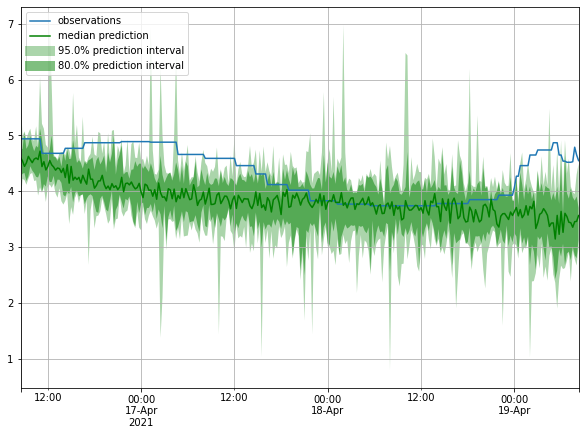

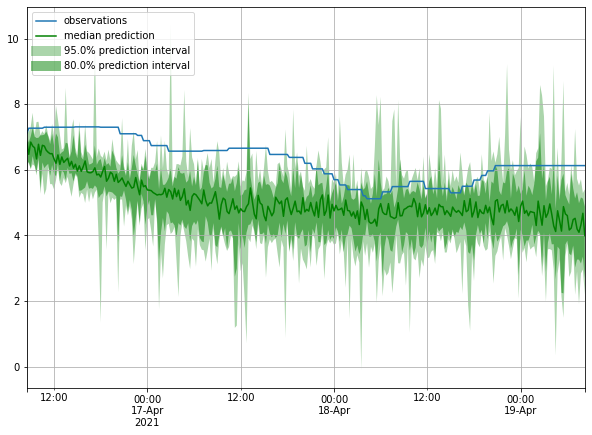

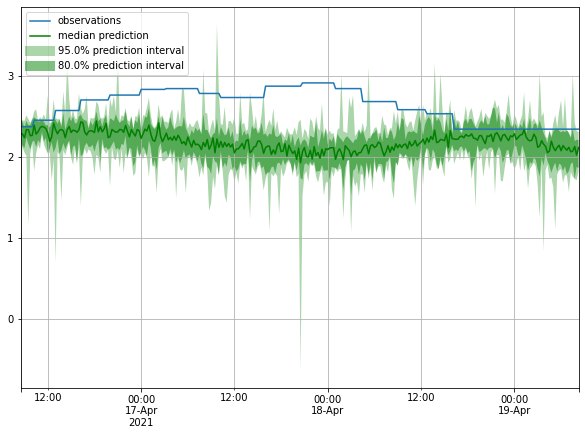

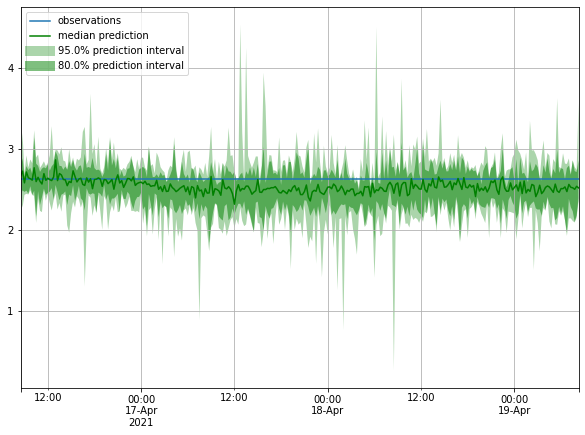

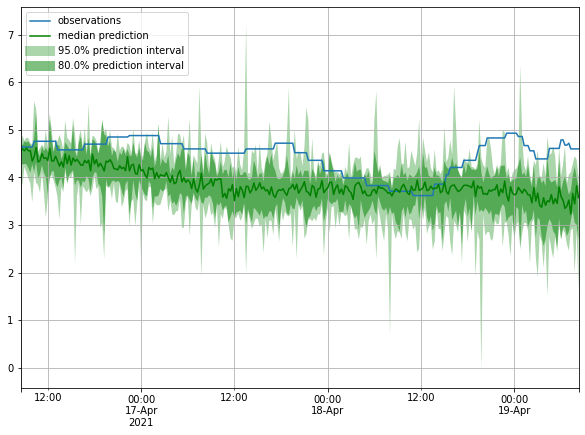

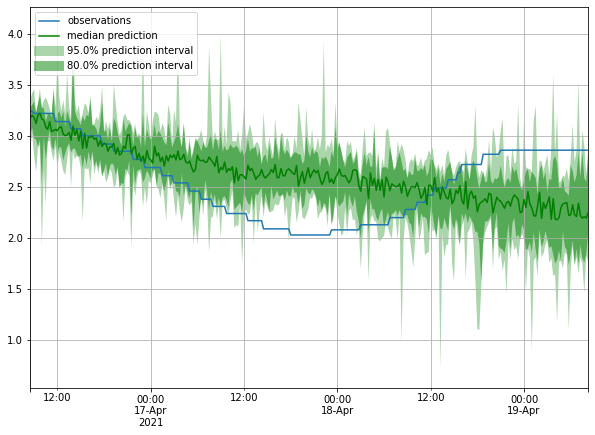

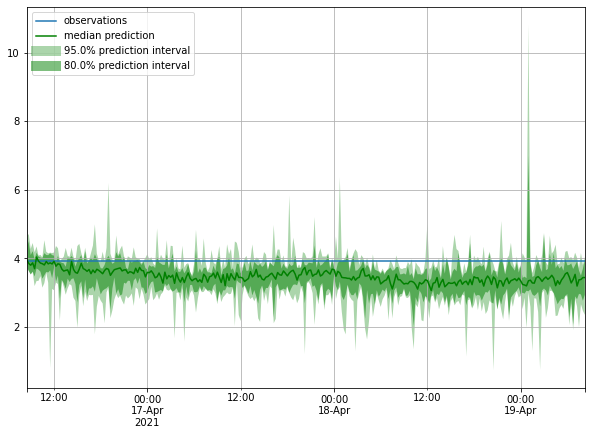

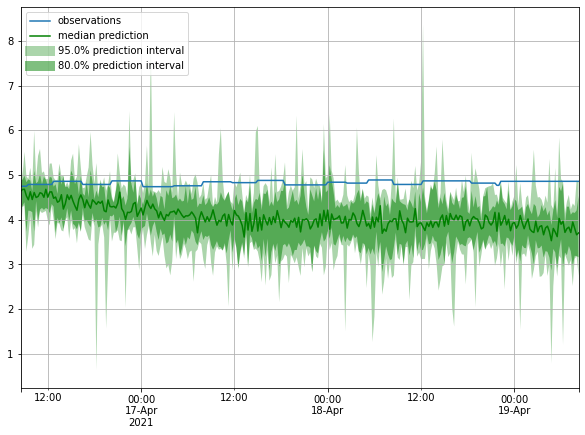

In [ ]:
for i in tqdm(range(12)):
  ts_entry=tss[i]
  forecast_entry=forecasts[i]
  plot_prob_forecasts(ts_entry,forecast_entry)

In [ ]:
from gluonts.evaluation import Evaluator
evaluator=Evaluator(quantiles=[0.1,0.5,0.9])
agg_metrics,item_metrics=evaluator(iter(tss),iter(forecasts), num_series=len(df_test[0:12]))

In [ ]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,0.045563,51.474449,711.849976,2.471701,0.009369,19.077476,0.073077,0.073309,NaN,152.558802,21.514114,0.125000,51.474450,0.402778,26.516552,0.729167
1,NaN,0.403559,160.103699,1322.300049,4.591320,0.013241,41.983994,0.120250,0.129027,NaN,446.427064,57.695215,0.000000,160.103703,0.003472,110.939404,0.232639
2,NaN,0.440801,150.118332,1218.199951,4.229861,0.005328,97.822542,0.120532,0.131980,NaN,1244.450490,55.847722,0.000000,150.118335,0.020833,123.184477,0.357639
3,NaN,2.340303,396.182190,1859.590088,6.456910,0.010223,134.567290,0.211575,0.239679,NaN,2116.718741,122.820933,0.000000,396.182204,0.000000,404.511876,0.072917
4,NaN,0.392259,137.903564,1245.900024,4.326042,0.007169,66.795239,0.104663,0.113984,NaN,831.867045,52.106165,0.000000,137.903568,0.128472,116.446137,0.451389
5,NaN,1.854689,351.184998,1816.010010,6.305590,0.014870,82.004579,0.191607,0.214668,NaN,1058.502958,116.954742,0.000000,351.185024,0.000000,311.555197,0.138889
6,NaN,0.278827,127.471619,758.269958,2.632882,0.005168,85.650489,0.162158,0.181210,NaN,1747.873891,37.513578,0.000000,127.471623,0.000000,154.596573,0.180556
7,NaN,0.017097,27.952038,754.559937,2.620000,0.007215,13.452130,0.037044,0.037942,NaN,112.965688,19.001389,0.000000,27.952039,0.114583,9.719055,0.854167
8,NaN,0.523589,171.131042,1285.439941,4.463333,0.009923,59.880586,0.129398,0.141516,NaN,767.890856,59.753460,0.006944,171.131051,0.062500,153.001996,0.309028
9,NaN,0.153044,96.002083,735.650024,2.554340,0.006574,50.702304,0.138920,0.134437,NaN,529.589595,55.498534,0.357639,96.002084,0.576389,46.319888,0.756944
